In [55]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv("/Users/boitumelomaseko/Data Science/Projects/Credit Card/artifacts/creditcard.csv")
data.shape

(284807, 31)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
round(data.Class.value_counts()/len(data)*100,2)

Class
0    99.83
1     0.17
Name: count, dtype: float64

Note: Highly disproportionate dataset. Models are will try to discount the lesser class and will find it difficult to detect fraudulent cases. This is what I should confront. 

In [6]:
def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage
    
    Parameters:
    df (DataFrame): Dataframe to check
    
    Returns:
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0]/len(df)
    null_values.columns = ['null_count','null_pct']
    return null_values

nulls_summary_table(data)

,null_count,null_pct
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


No null values on this dataset. 

<Axes: >

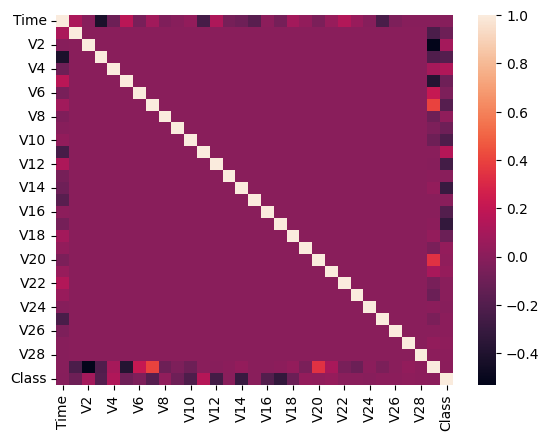

In [7]:
sns.heatmap(data.corr())

In [8]:
df_corr = pd.DataFrame(round(data.corr(),3))

In [9]:
df_corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,0.117,-0.011,-0.420,-0.105,0.173,-0.063,0.085,-0.037,-0.009,...,0.045,0.144,0.051,-0.016,-0.233,-0.041,-0.005,-0.009,-0.011,-0.012
V1,0.117,1.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,...,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.228,-0.101
V2,-0.011,0.000,1.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,...,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.531,0.091
V3,-0.420,-0.000,0.000,1.000,0.000,-0.000,0.000,0.000,-0.000,0.000,...,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.211,-0.193
V4,-0.105,-0.000,-0.000,0.000,1.000,-0.000,-0.000,-0.000,0.000,0.000,...,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.099,0.133
V5,0.173,0.000,0.000,-0.000,-0.000,1.000,0.000,0.000,0.000,0.000,...,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.386,-0.095
V6,-0.063,-0.000,0.000,0.000,-0.000,0.000,1.000,0.000,-0.000,0.000,...,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.216,-0.044
V7,0.085,-0.000,0.000,0.000,-0.000,0.000,0.000,1.000,0.000,0.000,...,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.397,-0.187
V8,-0.037,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.103,0.020
V9,-0.009,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.044,-0.098


In [10]:
round(data.describe(),3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,...,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


#### Assumptions

* Features V1-V28 have been scaled/normalized.
* Time and Amount have not been tampered with. 

<Axes: title={'center': 'Time plot'}, xlabel='Count', ylabel='Time'>

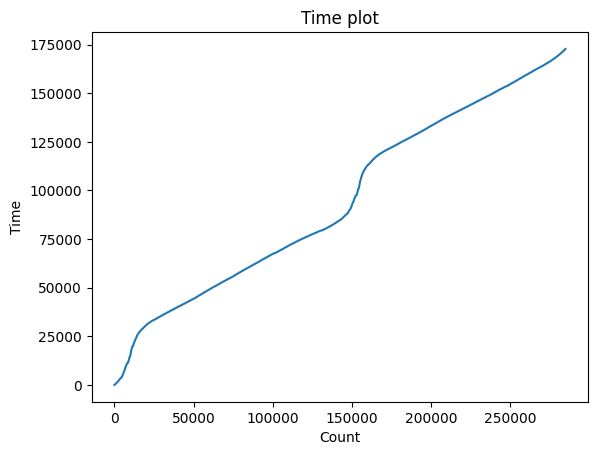

In [11]:
df = data.copy()

df['Time'].plot(title="Time plot", xlabel="Count", ylabel="Time")

<Axes: title={'center': 'Amount Boxplot'}, ylabel='Values'>

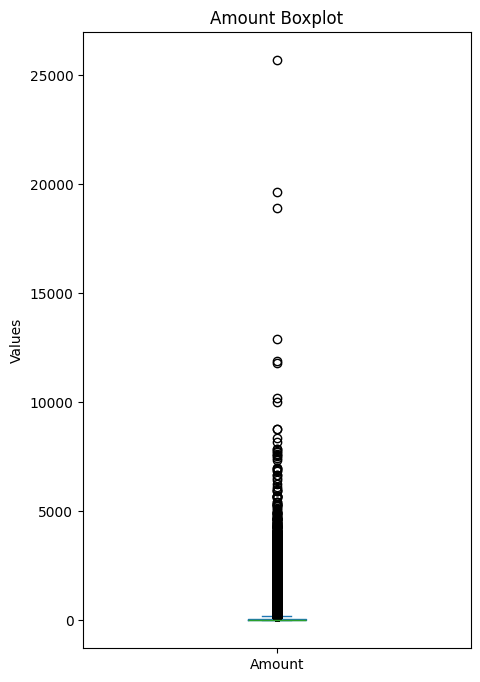

In [12]:
df['Amount'].plot(kind='box', title="Amount Boxplot", ylabel="Values", figsize=(5,8))

/var/folders/0j/9kgwgy2n3yld2hdt796pyp3w0000gn/T/ipykernel_81832/3610081977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Class", palette=["blue","red"])


Text(0.5, 1.0, 'Non-Fraud (0) vs Fraud (1)')

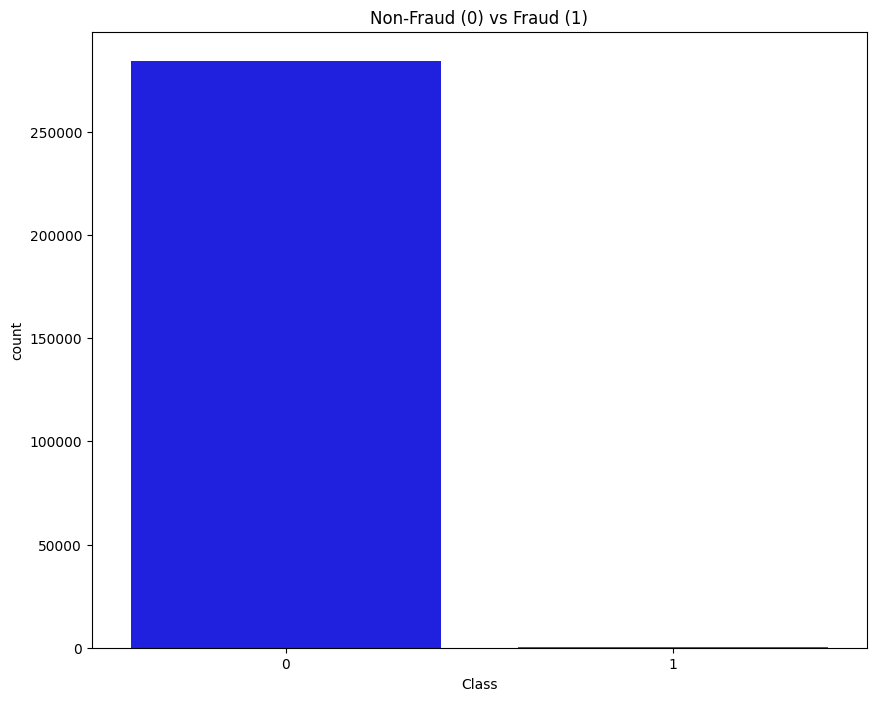

In [13]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x="Class", palette=["blue","red"])
plt.title("Non-Fraud (0) vs Fraud (1)")

<Axes: title={'center': 'Density Distribution for Amount'}, xlabel='Amount', ylabel='Density'>

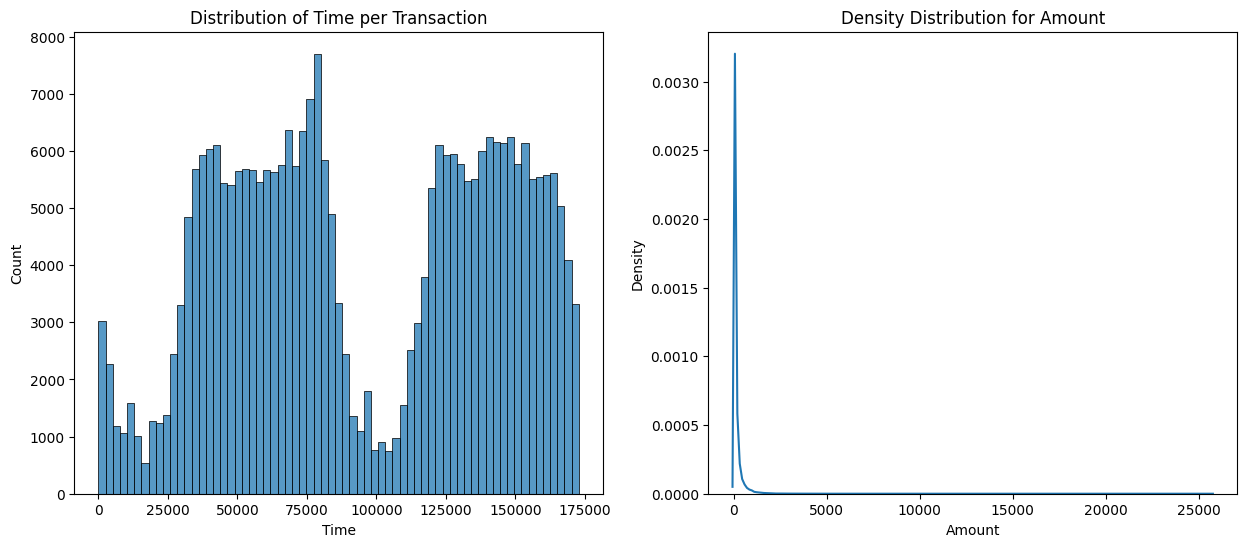

In [14]:
# Distribution plots of Time and Amount 
fig = plt.figure(figsize=(15,6))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.set_title("Distribution of Time per Transaction")

ax1.set_xlabel("Amount")
ax1.set_title("Density Distribution for Amount")

sns.histplot(data=df["Time"], ax=ax0, )
sns.kdeplot(data=df["Amount"].values, ax=ax1)

In [15]:
df["Time"].values.reshape(-1,1)

array([[0.00000e+00],
       [0.00000e+00],
       [1.00000e+00],
       ...,
       [1.72788e+05],
       [1.72788e+05],
       [1.72792e+05]], shape=(284807, 1))

In [16]:
# Data scaling and balancing. 

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

time_array = df["Time"].values.reshape(-1,1)
amount_array = df["Amount"].values.reshape(-1,1)

df["Time_scaled"],df["Amount_scaled"] = scaler.fit_transform(time_array), scaler.fit_transform(amount_array)

In [17]:
df.shape

(284807, 33)

In [18]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_scaled', 'Amount_scaled'],
      dtype='object')

In [19]:
df.drop(columns=["Time", "Amount"], axis=1, inplace=True)

In [20]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [22]:
# Splitting the data

X_1 = df.copy()
y_1 = X_1.pop("Class")

In [23]:
y_1.sum()

np.int64(492)

In [24]:
X_1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time_scaled,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.994960,0.670579


In [25]:
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_1, y_1)

In [26]:
X_resampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time_scaled,Amount_scaled
138028,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,-0.597739,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,-0.026340,-0.296793
63099,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,0.170547,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,-0.401062,-0.249004
73411,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,2.051312,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,-0.347361,-0.097813
164247,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,-1.238598,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,0.374534,0.489066
148999,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,1.166335,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.067458,-0.307413


In [27]:
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)
df_resampled = df_balanced.sample(frac=1, random_state=42)
df_resampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time_scaled,Amount_scaled,Class
42756,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,-12.888158,...,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,-0.510568,-0.307413,1
1686,-1.379848,0.536720,2.647870,1.408111,0.126442,0.986525,0.960251,-0.629717,1.729173,1.346832,...,-0.343574,0.022138,0.093532,0.011293,-0.503395,-0.438189,-0.346731,-0.979617,0.304618,0
111690,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,-4.684233,...,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,-0.145267,3.030811,1
128360,-0.671155,1.183971,0.793623,-0.218410,0.357282,-0.023707,0.363563,0.463983,-0.704518,-0.774565,...,-0.352537,-0.092199,-0.764804,-0.292712,0.185362,-0.028254,0.055953,-0.070572,-0.289248,0
20746,1.087002,0.065459,0.485043,1.343874,-0.283361,0.002520,-0.076665,0.165384,0.151865,0.065573,...,0.016005,-0.048042,0.208209,0.571482,-0.340377,0.028643,0.007649,-0.627921,-0.048068,0


<Axes: >

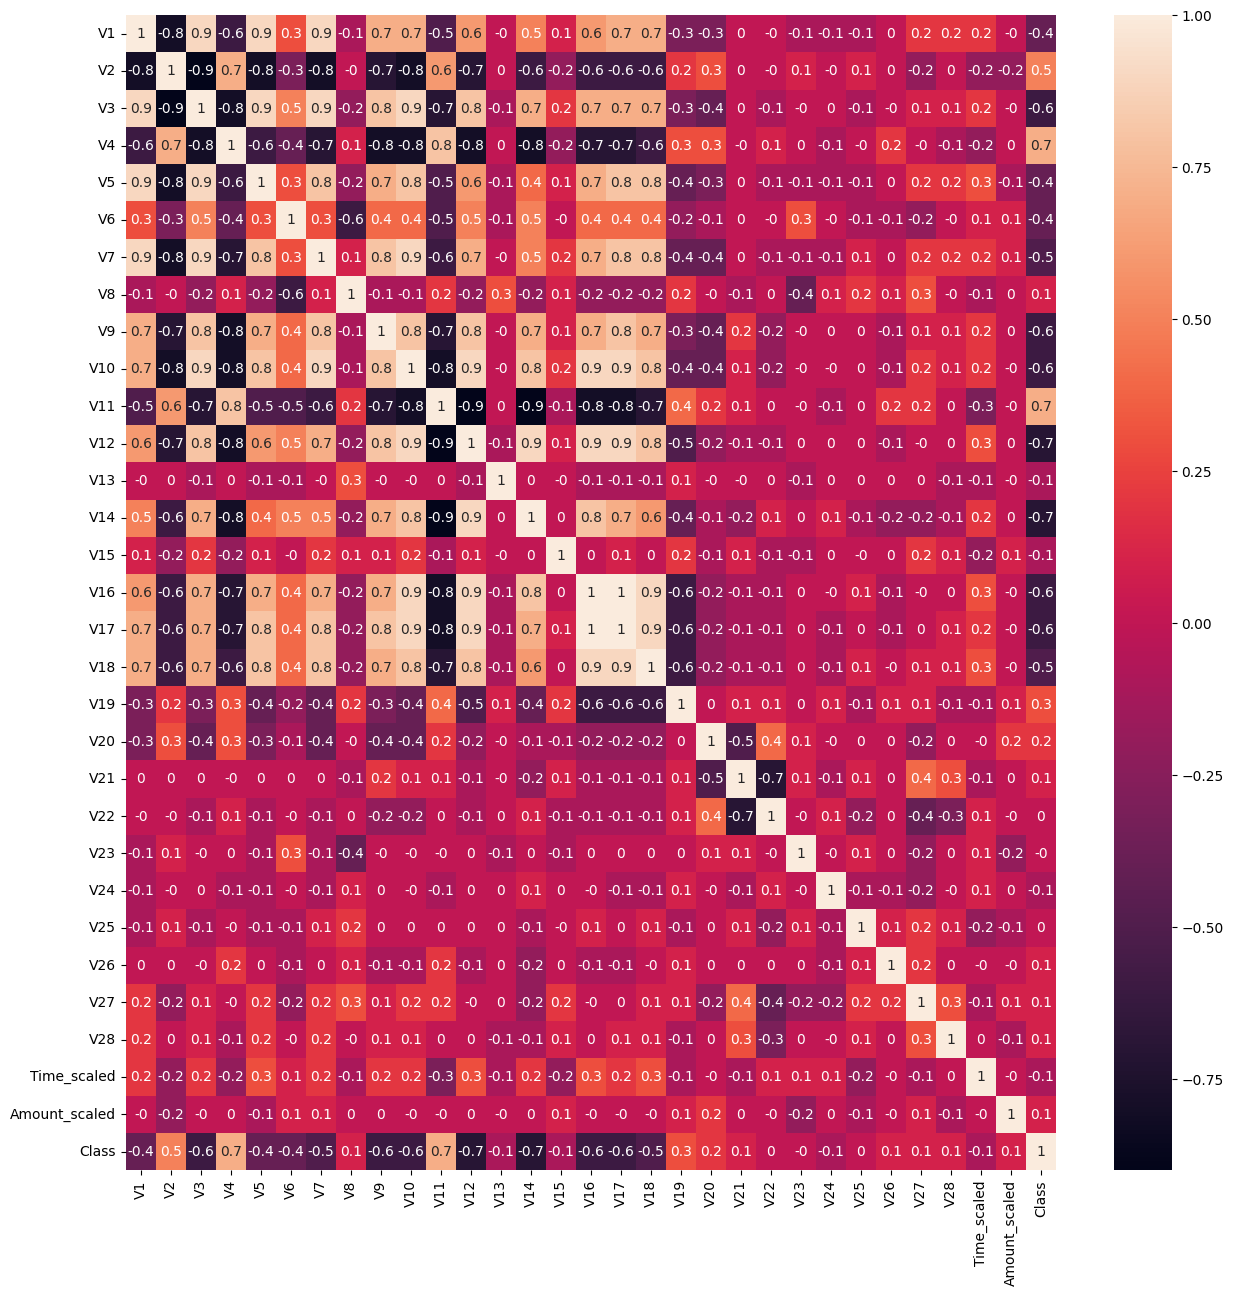

In [28]:
plt.figure(figsize=(15, 15))
sns.heatmap(round(df_resampled.corr(),1), annot=True)

In [29]:
df_balanced.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time_scaled',
       'Amount_scaled', 'Class'],
      dtype='object')

In [30]:
df_attributes = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
                'V12', 'V13', 'V14' 
                ]
for parameter in df_attributes:
    pearson_coef, p_value = stats.pearsonr(df_resampled[parameter], df_resampled['Class'])
    print(parameter)
    print('The Pearson Correlation Coefficient for ', parameter, ' is ', pearson_coef, 'with a P-value of P =', p_value)

V1
The Pearson Correlation Coefficient for  V1  is  -0.44609300347492853 with a P-value of P = 2.744288617335012e-49
V2
The Pearson Correlation Coefficient for  V2  is  0.491903735196894 with a P-value of P = 4.3525354908430184e-61
V3
The Pearson Correlation Coefficient for  V3  is  -0.5643709529396342 with a P-value of P = 7.5935956043871915e-84
V4
The Pearson Correlation Coefficient for  V4  is  0.7126098329518219 with a P-value of P = 2.4461955957311485e-153
V5
The Pearson Correlation Coefficient for  V5  is  -0.3822335222294694 with a P-value of P = 1.3839824048788773e-35
V6
The Pearson Correlation Coefficient for  V6  is  -0.3892572578562512 with a P-value of P = 5.9679515952180674e-37
V7
The Pearson Correlation Coefficient for  V7  is  -0.4777303428541182 with a P-value of P = 3.0387437002384964e-57
V8
The Pearson Correlation Coefficient for  V8  is  0.05720713612049645 with a P-value of P = 0.0728601295868028
V9
The Pearson Correlation Coefficient for  V9  is  -0.559588501926318

In [31]:
df_attributes = ['V15','V16', 'V17', 'V18', 'V19', 'V20', 'V21',
                'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
for parameter in df_attributes:
    pearson_coef, p_value = stats.pearsonr(df_resampled[parameter], df_resampled['Class'])
    print(parameter)
    print('The Pearson Correlation Coefficient for ', parameter, ' is ', pearson_coef, 'with a P-value of P =', p_value)

V15
The Pearson Correlation Coefficient for  V15  is  -0.05763560764278059 with a P-value of P = 0.0707369149502942
V16
The Pearson Correlation Coefficient for  V16  is  -0.5977897679727967 with a P-value of P = 2.2032082345703124e-96
V17
The Pearson Correlation Coefficient for  V17  is  -0.5591694223508994 with a P-value of P = 5.0732981932707686e-82
V18
The Pearson Correlation Coefficient for  V18  is  -0.4648567508177901 with a P-value of P = 6.623463243529083e-54
V19
The Pearson Correlation Coefficient for  V19  is  0.26780887103190376 with a P-value of P = 1.2659978914539829e-17
V20
The Pearson Correlation Coefficient for  V20  is  0.1690254886064075 with a P-value of P = 9.61758642142081e-08
V21
The Pearson Correlation Coefficient for  V21  is  0.12470790975537074 with a P-value of P = 8.77139204342732e-05
V22
The Pearson Correlation Coefficient for  V22  is  0.014889061493508462 with a P-value of P = 0.6408692323660654
V23
The Pearson Correlation Coefficient for  V23  is  -0.022

In [32]:
df_attributes = ['Time_scaled', 'Amount_scaled']
for parameter in df_attributes:
    pearson_coef, p_value = stats.pearsonr(df_resampled[parameter], df_resampled['Class'])
    print(parameter)
    print('The Pearson Correlation Coefficient for ', parameter, ' is ', pearson_coef, 'with a P-value of P =', p_value)

Time_scaled
The Pearson Correlation Coefficient for  Time_scaled  is  -0.1491216814970343 with a P-value of P = 2.6257926020580247e-06
Amount_scaled
The Pearson Correlation Coefficient for  Amount_scaled  is  0.09443407516224162 with a P-value of P = 0.0030254088186078094


### Observations

* P-Value of the following features indicate that there might not be due random chance but the correlation coefficient indicates features having virtually 0 correlation with the target variable. 
* V8
* V15
* V22
* V23
* V25

<Axes: xlabel='V10', ylabel='V7'>

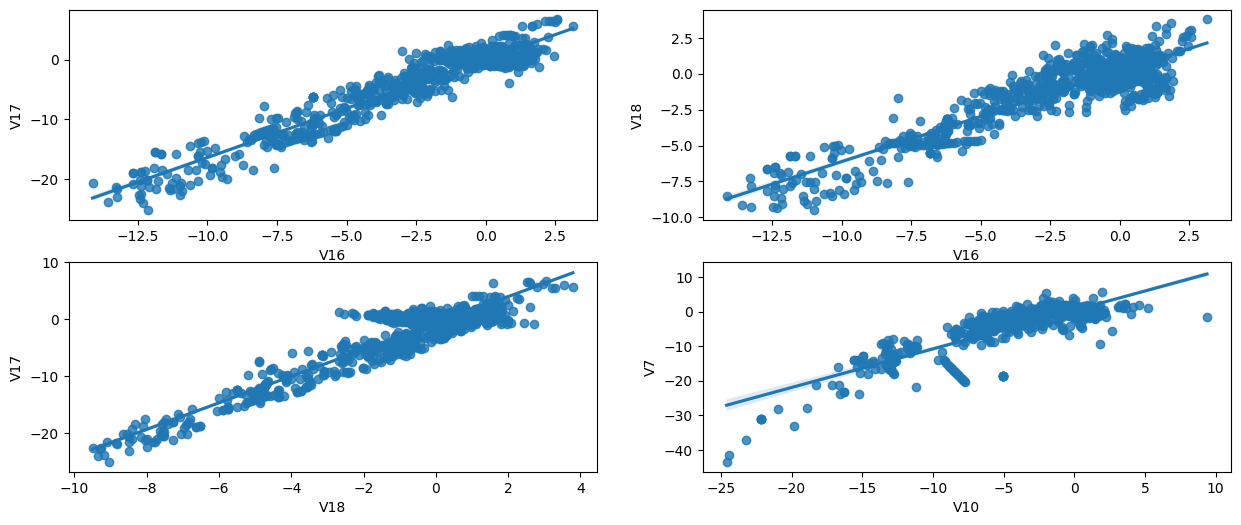

In [33]:
fig = plt.figure(figsize=(15,6))

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

sns.regplot(df_resampled, x="V16", y="V17", ax=ax0)
sns.regplot(df_resampled, x="V16", y="V18", ax=ax1)
sns.regplot(df_resampled, x="V18", y="V17", ax=ax2)
sns.regplot(df_resampled, x="V10", y="V7", ax=ax3)


In [34]:
def calculate_vif(df):
    # Only include numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Compute VIF
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df_numeric.columns
    vif_data["VIF"] = [
        variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])
    ]
    return vif_data

In [43]:
vif = calculate_vif(df_resampled)
len(vif[vif["VIF"] < 10])

18

In [36]:
X = df_resampled.copy()
y = X.pop("Class")

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
important_features = [feature for feature, importance in zip(X.columns, importances) if importance > 0.01]

In [37]:
print(important_features)
print(len(important_features))

['V2', 'V3', 'V4', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V19', 'V20', 'V21', 'V27']
16


In [38]:
print(importances)
print(len(importances))

[0.00733299 0.02049515 0.07477166 0.10425866 0.00606561 0.00701816
 0.02453356 0.01288983 0.01386147 0.11778187 0.06563209 0.06852428
 0.00916134 0.21047618 0.0078218  0.03692637 0.10154413 0.00864897
 0.0136282  0.01016697 0.01505322 0.00484007 0.0078495  0.0066398
 0.00652899 0.00719292 0.01167866 0.00574426 0.0051736  0.0077597 ]
30


In [39]:
mi_scores = mutual_info_classif(X, y)
mi_features = pd.Series(mi_scores, index=pd.DataFrame(X).columns)
selected_features = mi_features[mi_features > 0.01].index  # Keep significant features
X_mi = pd.DataFrame(X)[selected_features]
X_mi

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time_scaled,Amount_scaled
42756,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,-12.888158,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,-0.510568,-0.307413
1686,-1.379848,0.536720,2.647870,1.408111,0.126442,0.986525,0.960251,-0.629717,1.729173,1.346832,...,-0.666874,-0.343574,0.022138,0.093532,0.011293,-0.503395,-0.438189,-0.346731,-0.979617,0.304618
111690,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,-4.684233,...,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,-0.145267,3.030811
128360,-0.671155,1.183971,0.793623,-0.218410,0.357282,-0.023707,0.363563,0.463983,-0.704518,-0.774565,...,-0.083474,-0.352537,-0.092199,-0.764804,-0.292712,0.185362,-0.028254,0.055953,-0.070572,-0.289248
20746,1.087002,0.065459,0.485043,1.343874,-0.283361,0.002520,-0.076665,0.165384,0.151865,0.065573,...,-0.040723,0.016005,-0.048042,0.208209,0.571482,-0.340377,0.028643,0.007649,-0.627921,-0.048068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35123,-2.045484,-0.603428,-0.386028,-3.278179,0.840525,3.868593,0.785816,1.183953,1.009150,-2.479646,...,0.147327,0.243740,-0.357663,1.052686,1.112681,-0.749815,-0.005714,-0.173156,-0.548832,4.583246
84735,-0.377304,0.572787,1.333869,-0.000070,0.304511,-0.084981,0.497673,0.022442,0.100338,-0.664655,...,-0.023137,0.118389,-0.270359,-0.393864,-0.062653,0.510585,0.094780,0.126249,-0.284931,-0.126458
189587,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,-0.467556,-4.565260,...,0.586829,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,0.514327,0.641375
175852,1.554783,-1.059409,-0.658570,0.112271,-0.724124,-0.288185,-0.241162,-0.044019,0.879991,-0.121252,...,0.021068,-0.344273,0.131801,-0.336523,-0.569150,-0.302588,-0.035571,-0.008578,0.444378,2.904772


In [40]:
from sklearn.feature_selection import VarianceThreshold

X_vt = VarianceThreshold(threshold=0.01).fit_transform(X)
X_vt

array([[-1.06457996e+01,  5.91830666e+00, -1.16710426e+01, ...,
        -1.52908081e-01, -5.10567558e-01, -3.07412841e-01],
       [-1.37984835e+00,  5.36719684e-01,  2.64787014e+00, ...,
        -3.46730811e-01, -9.79616772e-01,  3.04618179e-01],
       [-4.19873461e+00,  1.94120637e-01, -3.91758568e+00, ...,
        -1.31524644e-01, -1.45267214e-01,  3.03081115e+00],
       ...,
       [ 9.09123839e-01,  1.33765782e+00, -4.48472767e+00, ...,
         3.19879228e-01,  5.14327001e-01,  6.41374974e-01],
       [ 1.55478327e+00, -1.05940877e+00, -6.58570433e-01, ...,
        -8.57818648e-03,  4.44377871e-01,  2.90477189e+00],
       [-2.37304316e+00,  2.56343777e+00,  2.25780654e-01, ...,
        -1.48522812e-01, -3.95681340e-02,  3.04618179e-02]],
      shape=(984, 30))

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

classifiers = {
    "LogisticRegression":LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier(),
    "SVM":SVC()
}

for key,classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    train_score = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
    print(f"Classifier: {classifier} training score: {train_score.mean()}.")


Classifier: LogisticRegression() training score: 0.9376924937515116.
Classifier: RandomForestClassifier() training score: 0.9402563895831655.
Classifier: SVC() training score: 0.9364508586632265.


In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [49]:
logreg_params ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,logreg_params, cv=10)
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [50]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9415449529373581


In [53]:
logreg_yhat = logreg_cv.predict(X_test)
logreg_cm = confusion_matrix(y_true=y_test, y_pred=logreg_yhat)
logreg_cm

array([[109,   1],
       [ 12,  75]])

In [56]:
print(classification_report(y_test, logreg_yhat))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       110
           1       0.99      0.86      0.92        87

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



In [57]:
rf_params = {'criterion': ['gini', 'entropy','log_loss'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, rf_params, cv=10)
rf_cv.fit(X_train, y_train)

print("tuned hyperparameters :(best parameters) ",rf_cv.best_params_)
print("accuracy :",rf_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy : 0.9504543979227524


In [58]:
rf_yhat = rf_cv.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_yhat)
rf_cm

array([[110,   0],
       [ 14,  73]])

In [59]:
print(classification_report(y_test, rf_yhat))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       110
           1       1.00      0.84      0.91        87

    accuracy                           0.93       197
   macro avg       0.94      0.92      0.93       197
weighted avg       0.94      0.93      0.93       197

